<a href="https://colab.research.google.com/github/inesarruda/python_table/blob/master/Pandas_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalhando com Planilhas no Excel

In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Jutando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Mostrando as primeiras linhas do arquivo novo
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Mostrando as ultimas linhas do arquivo novo
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pegando uma amostra (creio que aleatória)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
94,Aracaju,2018-01-01,198.24,1521,9
198,Natal,2019-01-02,13.65,1037,3
123,Natal,2019-01-02,127.45,1036,3
160,Natal,2019-01-02,11.76,1034,1
27,Salvador,2019-01-01,145.79,1034,1


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Tratando Valores Faltantes

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Apagando as linhas com valores nulos com base em apenas uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Apagando as linhas com valores faltantes em todas as colunas
df.dropna(how = "all", inplace=True)

Criando Novas Colunas

In [ ]:
#Criando a coluna de Receitas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retornando a maior receita
df["Receitas"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receitas"].min()

3.34

In [ ]:
#nlargest --> Retorna os N maiores valores do parametro desejado
df.nlargest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest --> Retorna os N menores valores do parametro desejado
df.nsmallest(3,"Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [ ]:
#Ordenando o Conjunto de Dados
df.sort_values("Receitas", ascending = False). head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


Trabalhando com datas

In [ ]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [ ]:
#Transformando a coluna de data em para o tipo int, geralmente vem nesse formato e então trocamos para datetime
df["Data"] = df["Data"].astype("int64")
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Cidade       object
Data          int64
Vendas      float64
LojaID       object
Qtde          int64
Receitas    float64
dtype: object

In [ ]:
#Transformando a coluna Data para o formato datetime
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [ ]:
#Transformando a coluna Data para o formato datetime, forma alternativa

df["Data"] = df["Data"].astype("datetime64[ns]")
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [ ]:
#Agrupando por ano --> Receitas
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
133,Salvador,2019-03-02,153.71,1035,1,153.71,2019
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
12,Recife,2019-01-01,17.48,982,2,34.96,2019
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018
70,Aracaju,2018-01-01,8.44,1523,9,75.96,2018
55,Salvador,2019-01-01,36.62,1036,1,36.62,2019
76,Recife,2019-01-01,17.86,980,5,89.30,2019
179,Salvador,2019-01-02,64.95,1036,1,64.95,2019
171,Natal,2019-01-02,136.45,1035,3,409.35,2019
98,Salvador,2019-01-01,231.76,1036,3,695.28,2019


In [ ]:
#Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"]  = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,1,2
163,Salvador,2019-01-02,17.66,1036,3,52.98,2019,1,2
93,Recife,2019-01-01,17.45,980,6,104.70,2019,1,1
26,Natal,2018-07-20,370.00,853,3,1110.00,2018,7,20
12,Recife,2019-01-01,17.48,982,2,34.96,2019,1,1
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,2019,1,1
164,Natal,2019-01-02,6.59,1035,1,6.59,2019,1,2
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3
230,Natal,2019-01-03,184.69,1036,1,184.69,2019,1,3


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias do conjunto de dados
df["Diferença_Dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias
189,Salvador,2019-01-02,139.73,1037,2,279.46,2019,1,2,366 days
67,Recife,2019-01-01,179.52,983,5,897.60,2019,1,1,365 days
64,Salvador,2019-01-01,37.96,1037,3,113.88,2019,1,1,365 days
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days
18,Aracaju,2018-01-01,32.14,1522,6,192.84,2018,1,1,0 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,trimestre_venda
155,Natal,2019-01-02,237.81,1036,3,713.43,2019,1,2,366 days,1
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,2019,1,1,365 days,1
89,Salvador,2019-01-01,17.46,1034,1,17.46,2019,1,1,365 days,1
110,Aracaju,2018-01-01,38.15,1520,4,152.60,2018,1,1,0 days,1
190,Salvador,2019-01-02,78.78,1035,3,236.34,2019,1,2,366 days,1


In [ ]:
#Filtrando as vendas de 2019 de um determinado mês

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3) ]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,trimestre_venda
109,Salvador,2019-03-02,124.37,1035,1,124.37,2019,3,2,425 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17,440 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1


Visualização de Dados

In [ ]:
#Usando o value_counts --> Ele conta a qtde de linhas (vendas) que tem naquela loja, nesse caso do maior pra o menor
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

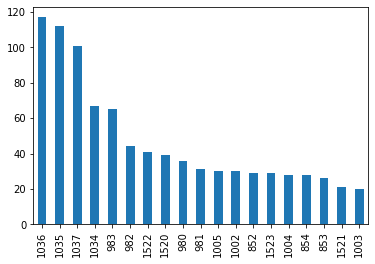

In [ ]:
#Gráfico em Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

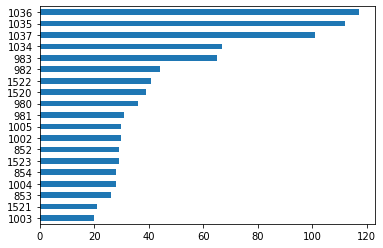

In [ ]:
#Gráfico em Barras Horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

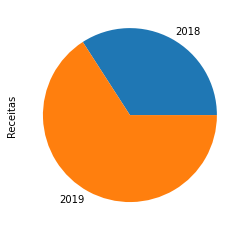

In [ ]:
#Gráfico de Pizza, receita por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de vendas')

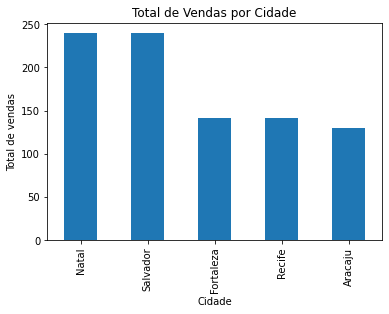

In [ ]:
#Adcionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")


Text(0, 0.5, 'Total de vendas')

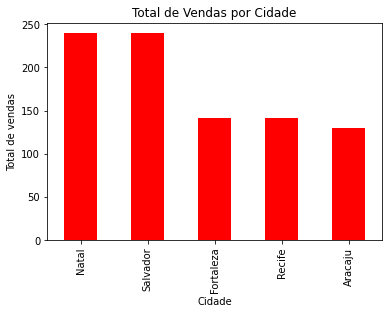

In [ ]:
#Alterando a cor
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade", color = "r")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

In [ ]:
#Alterando o estilo do gráfico 
plt.style.use("ggplot")

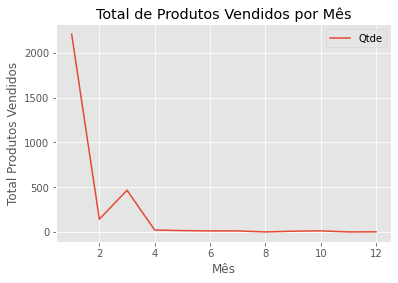

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

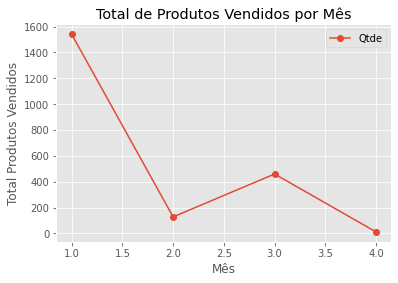

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

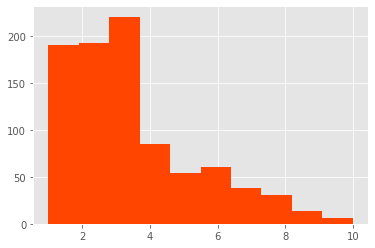

In [ ]:
#Histograma
plt.hist(df["Qtde"], color = "orangered");

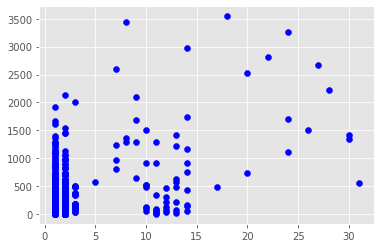

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y= df_2019["Receitas"], color ="b");


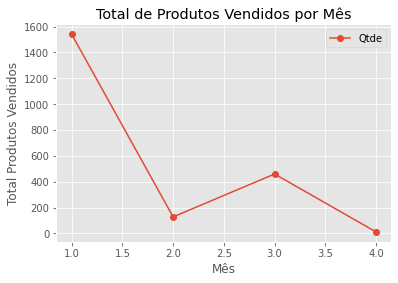

In [ ]:
#Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos por Mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico QTDE x MES.png")